In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.stats import norm
import scipy.constants as scp
from scipy.integrate import quad
from tabulate import tabulate
from scipy import signal
import scipy.constants as const

In [31]:
def sigma(x, y, dx, dy):
    s = np.abs(x-y)/np.sqrt(dx**2 + dy**2)
    return s

---

# Zu Aufgabe 1

In [3]:
A1_C = np.array([470e-9, 4.7e-9, 47e-9]) #F
A1_R = np.array([1000, 10000, 1000]) #ohm
A1_T = np.array([0.33e-3, 32.9e-6, 34.4e-6]) #s
A1_dT = np.array([0.03e-3, 0.5e-6, 0.5e-6]) #s
A1_f = 100.00 #Hz
A1_T_hochpass = 37.6e-6 #s
A1_dT_hochpass = 0.5e-6 #s

In [4]:
A1_tau = A1_T /np.log(2)
A1_dtau = A1_dT /np.log(2)

A1_tau_theo = A1_R * A1_C
A1_dtau_theo = np.sqrt((0.05 * A1_R * A1_C)**2 + (A1_R * 0.10 * A1_C)**2)

A1_sigma_tau = sigma(A1_tau, A1_tau_theo, A1_dtau, A1_dtau_theo)

In [5]:
head1 = ['C', 'dC', 'R', 'dR', 'f', 'tau', 'dtau', 'ttau', 'dttau', 'sigs']
tab1 = zip(A1_C, 0.1*A1_C, A1_R, 0.05*A1_R, np.full(3, A1_f), A1_tau, A1_dtau, A1_tau_theo, A1_dtau_theo, A1_sigma_tau)

print(tabulate(tab1, headers=head1, tablefmt="latex"))

\begin{tabular}{rrrrrrrrrr}
\hline
       C &      dC &     R &   dR &   f &         tau &        dtau &    ttau &       dttau &      sigs \\
\hline
 4.7e-07 & 4.7e-08 &  1000 &   50 & 100 & 0.000476089 & 4.32809e-05 & 0.00047 & 5.25476e-05 & 0.0894481 \\
 4.7e-09 & 4.7e-10 & 10000 &  500 & 100 & 4.74647e-05 & 7.21348e-07 & 4.7e-05 & 5.25476e-06 & 0.0876062 \\
 4.7e-08 & 4.7e-09 &  1000 &   50 & 100 & 4.96287e-05 & 7.21348e-07 & 4.7e-05 & 5.25476e-06 & 0.495605  \\
\hline
\end{tabular}


# Zu Aufgabe 3

## Grenzfrequenz

In [35]:
a3_hp_hz, a3_hp_v, a3_hp_dBV = np.loadtxt('./data/A3-hochpass.txt', unpack=True, skiprows=1)
a3_tp_hz, a3_tp_v, a3_tp_dBV = np.loadtxt('./data/A3-tiefpass.txt', unpack=True, skiprows=1)

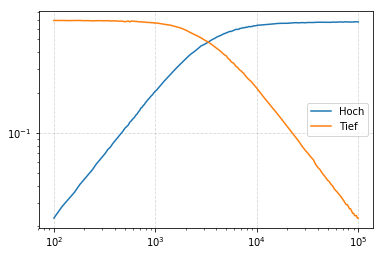

In [38]:
plt.grid(alpha=0.5, linestyle='--')
plt.plot(a3_hp_hz, a3_hp_v, label='Hoch')
plt.plot(a3_tp_hz, a3_tp_v, label='Tief')
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [8]:
#Fitfunctions:
def linfit(x,a,b):
    return a*x+b

def constfit(x,a):
    return a+x*0

def logfit(x,a,b):
    return a * np.log(x) + b

In [9]:
#Fits:
#1. Hochpass:
a3_hp_popt_const, a3_hp_pcov_const = curve_fit(logfit, a3_hp_hz[92:], a3_hp_v[92:])
a3_hp_popt_lin, a3_hp_pcov_lin = curve_fit(logfit, a3_hp_hz[46:63], a3_hp_v[46:63])

#2. Tiefpass
a3_tp_popt_lin, a3_tp_pcov_lin = curve_fit(logfit, a3_tp_hz[52:78], a3_tp_v[52:78])
a3_tp_popt_const, a3_tp_pcov_const = curve_fit(logfit, a3_tp_hz[:47], a3_tp_v[:47])

In [10]:
print(r"Fit 'Konstante' Hochpass: y = ({} +/- {}) * x + ({} +/- {})".format(a3_hp_popt_const[0], np.sqrt(a3_hp_pcov_const[0][0]), a3_hp_popt_const[1], np.sqrt(a3_hp_pcov_const[1][1])))
print(r"Fitgerade Hochpass: y = ({} +/- {}) * x + ({} +/- {})".format(a3_hp_popt_lin[0], np.sqrt(a3_hp_pcov_lin[0][0]), a3_hp_popt_lin[1], np.sqrt(a3_hp_pcov_lin[1][1])))

print(r"Fitgerade Tiefpass: y = ({} +/- {}) * x + ({} +/- {})".format(a3_tp_popt_lin[0], np.sqrt(a3_tp_pcov_lin[0][0]), a3_tp_popt_lin[1], np.sqrt(a3_tp_pcov_lin[1][1])))
print(r"Fit 'Konstante' Tiefpass: y = ({} +/- {}) * x + ({} +/- {})".format(a3_tp_popt_const[0], np.sqrt(a3_tp_pcov_const[0][0]), a3_tp_popt_const[1], np.sqrt(a3_tp_pcov_const[1][1])))

Fit 'Konstante' Hochpass: y = (0.011085614503482524 +/- 0.0007235344132963564) * x + (0.5500473131806516 +/- 0.007821078931007561)
Fitgerade Hochpass: y = (0.2320338920319687 +/- 0.0019707701682162323) * x + (-1.4045866877405686 +/- 0.015374463895697554)
Fitgerade Tiefpass: y = (-0.2440803962384312 +/- 0.0020819174852661194) * x + (2.4509050186581214 +/- 0.017510439423254996)
Fit 'Konstante' Tiefpass: y = (-0.013449969419114796 +/- 0.0011157712970210646) * x + (0.7623597336993404 +/- 0.006919189800809165)


In [11]:
#Schnittpunkte:
#1. Hochpass:
db1 = - a3_hp_popt_lin[1] + a3_hp_popt_const[1] #differenz der y-achsen abschnitte mit fehler
ddb1 = np.sqrt(np.sqrt(a3_hp_pcov_lin[1][1])**2 + np.sqrt(a3_hp_pcov_const[1][1])**2)

da1 = a3_hp_popt_lin[0] - a3_hp_popt_const[0] #differenz der steigungen
dda1 = np.sqrt(np.sqrt(a3_hp_pcov_lin[0][0])**2 + np.sqrt(a3_hp_pcov_const[0][0])**2)

a3_x_hp = db1 /da1
a3_dx_hp = a3_x_hp * np.sqrt((ddb1/db1)**2 + (dda1/da1)**2)

a3_x_hp = np.exp(a3_x_hp) #berücksichtigung der log-skalierung
a3_dx_hp = a3_x_hp * a3_dx_hp


#2. Tiefpass:
db2 = a3_tp_popt_const[1] - a3_tp_popt_lin[1] #differenz der y-achsen abschnitte mit fehler
ddb2 = np.sqrt(np.sqrt(a3_tp_pcov_const[1][1])**2 + np.sqrt(a3_tp_pcov_lin[1][1])**2)

da2 = a3_tp_popt_lin[0] - a3_tp_popt_const[0] #differenz der steigungen
dda2 = np.sqrt(np.sqrt(a3_tp_pcov_lin[0][0])**2 + np.sqrt(a3_tp_pcov_const[0][0])**2)

a3_x_tp = db2 /da2
a3_dx_tp = a3_x_tp * np.sqrt((ddb2/db2)**2 + (dda2/da2)**2)

a3_x_tp = np.exp(a3_x_tp) #berücksichtigung der log-skalierung
a3_dx_tp = a3_x_tp * a3_dx_tp

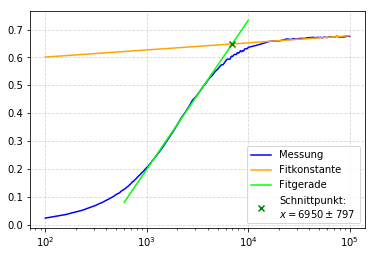

In [12]:
X = np.linspace(100, 100000, 100)
Y = np.linspace(600, 10000, 100)

plt.figure()
plt.grid(alpha=0.5, linestyle='--')
plt.plot(a3_hp_hz, a3_hp_v, color='blue', label='Messung')
plt.plot(X, logfit(X, *a3_hp_popt_const), color='orange', zorder=3, label='Fitkonstante')
plt.plot(Y, logfit(Y, *a3_hp_popt_lin), color='lime', zorder=5, label='Fitgerade')
plt.scatter(a3_x_hp, logfit(a3_x_hp, *a3_hp_popt_lin), marker='x', color='green', zorder=10, 
        label="\n".join([r"Schnittpunkt:", 
                          r'$x = {:.0f} \pm {:.0f}$'.format(a3_x_hp, a3_dx_hp)]))
plt.xscale('log')
plt.legend()

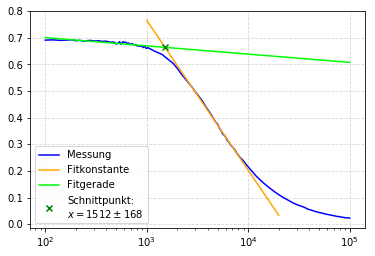

In [13]:
X = np.linspace(100, 100000, 100)
Y = np.linspace(1000, 20000, 100)

plt.figure()
plt.grid(alpha=0.5, linestyle='--')
plt.plot(a3_tp_hz, a3_tp_v, color='blue', label='Messung')
plt.plot(Y, logfit(Y, *a3_tp_popt_lin), color='orange', zorder=3, label='Fitkonstante')
plt.plot(X, logfit(X, *a3_tp_popt_const), color='lime', zorder=5, label='Fitgerade')
plt.scatter(a3_x_tp, logfit(a3_x_tp, *a3_tp_popt_lin), marker='x', color='green', zorder=10, 
        label="\n".join([r"Schnittpunkt:", 
                          r'$x = {:.0f} \pm {:.0f}$'.format(a3_x_tp, a3_dx_tp)]))
plt.xscale('log')
plt.legend()

## Phasengang

In [14]:
a3_f = np.arange(1,11) * 1000 #Hz
a3_t = np.array([0.22e-3, 0.08e-3, 56.4e-6, 28.6e-6, 17.2e-6, 11.9e-6, 10.4e-6, 7.2e-6, 5.8e-6, 4.9e-6]) #s
a3_dt = np.array([0.03e-3, 0.03e-3, 0.5e-6, 0.5e-6, 0.5e-6, 0.5e-6, 0.5e-6, 0.5e-6, 0.5e-6, 0.5e-6])
a3_phi = 360 * a3_f * a3_t
a3_dphi = 360 * a3_f * a3_dt

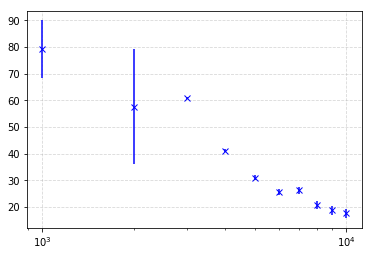

In [15]:
plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(a3_f, a3_phi, yerr=a3_dphi, color='blue', fmt='x', label='Messung')
plt.xscale('log')

In [16]:
def phifit(x,a,b, bkg, shift):
    return np.arctan(((x+shift)*a) + b) + bkg

In [17]:
a3_phi_popt, a3_phi_pcov = curve_fit(logfit, a3_f, a3_phi, sigma=a3_dphi, absolute_sigma=True)
a3_phi_popt

array([-40.24184942, 379.6282432 ])

In [18]:
#wert bei 45°:
db3 = 45 - a3_phi_popt[1]
ddb3 = np.sqrt(np.sqrt(a3_phi_pcov[1][1])**2)

da3 = a3_phi_popt[0] 
dda3 = np.sqrt(np.sqrt(a3_phi_pcov[0][0])**2)

a3_x_45 = db3 /da3
a3_dx_45 = a3_x_45 * np.sqrt((ddb3/db3)**2 + (dda3/da3)**2)

a3_x_45_exp = np.exp(a3_x_45)
a3_dx_45_exp = np.exp(a3_x_45) * a3_dx_45

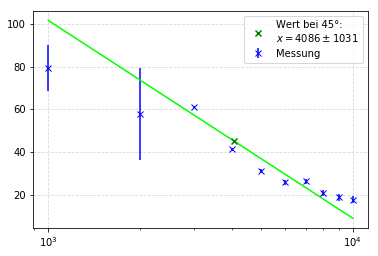

In [19]:
X = np.linspace(1000, 10000, 100)

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(a3_f, a3_phi, yerr=a3_dphi, color='blue', fmt='x', label='Messung')
plt.plot(X, logfit(X, *a3_phi_popt), color='lime')
plt.scatter(a3_x_45_exp, logfit(a3_x_45_exp, *a3_phi_popt), marker='x', color='green', zorder=10, 
        label="\n".join([r"Wert bei 45°:", 
                          r'$x = {:.0f} \pm {:.0f}$'.format(a3_x_45_exp, a3_dx_45_exp)]))
plt.legend()
plt.xscale('log')

# Zu Aufgabe 4

In [20]:
a4_fr = np.array([3.85, 3.77, 3.80]) * 1000 #Hz
a4_dfr = np.array([0.03, 0.03, 0.03]) * 1000

a4_wr = a4_fr * 2 * np.pi
a4_dwr = a4_dfr * 2 * np.pi

a4_C = 47e-9 #F

In [21]:
#Induktivitäten L1:
a4_L1 = 1/(a4_C * a4_wr**2)
a4_dL1 = a4_L1 * np.sqrt((2 * a4_dwr/a4_wr)**2)

for i in range(0,3):
    print("L1 = ({} +/- {})".format(a4_L1[i], a4_dL1[i]))

L1 = (0.036359754844503135 +/- 0.0005666455300442047)
L1 = (0.037919247034922346 +/- 0.0006034893427308597)
L1 = (0.03732288546971245 +/- 0.000589308717942828)


In [22]:
#Gesamtwiderstand R + R_V:
a4_deltaf = np.array([4.91, 1.49, 0.79]) * 1000 #Hz
a4_ddeltaf = np.array([0.03, 0.03, 0.03]) * 1000

a4_deltaw = a4_deltaf * 2 * np.pi 
a4_ddeltaw = a4_ddeltaf * 2 * np.pi 

a4_Rges = a4_deltaw * a4_L1
a4_dRges = np.sqrt((a4_ddeltaw * a4_L1)**2 + (a4_deltaw * a4_dL1)**2)

for i in range(0,3):
    print("R + R_V = ({} +/- {})".format(a4_Rges[i], a4_dRges[i]))

R + R_V = (1121.7144300911223 +/- 18.776771175957816)
R + R_V = (354.99794718541443 +/- 9.110925103304249)
R + R_V = (185.26021842782654 +/- 7.619093263056365)


# Zu Aufgabe 5

## Log. Dekrement

In [23]:
a5_A = np.array([1.59, 0.72, 0.25, -0.03, -0.19])
a5_dA = np.full(5, 0.03)
a5_T = 0.27e-3 #s
a5_dT = 0.03e-3

a5_TT = a5_T * np.arange(0,5)
a5_dTT = a5_dT * np.arange(0,5)

In [24]:
def exp_bkg(x,a,d,bkg):
    return a * np.exp(-d * x) - bkg

In [25]:
a5_ampfit_opt, a5_ampfit_cov = curve_fit(exp_bkg, a5_TT, a5_A, sigma=a5_dA, absolute_sigma=True)

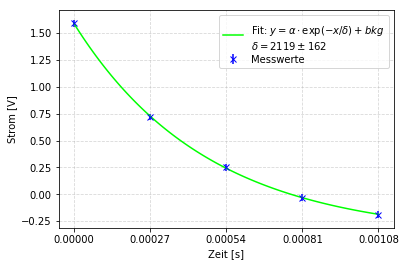

In [26]:
X = np.linspace(0, a5_TT[-1], 100)

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(a5_TT, a5_A, yerr=a5_dA, fmt='x', color='blue', label='Messwerte')
plt.plot(X, exp_bkg(X, *a5_ampfit_opt), color='lime',
        label="\n".join([r"Fit: $y = \alpha \cdot \exp{(-x/ \delta)} + bkg$", 
                          r'$\delta = {:.0f} \pm {:.0f}$'.format(a5_ampfit_opt[1], np.sqrt(a5_ampfit_cov[1][1]))]))
plt.xticks(a5_TT)
plt.ylabel('Strom [V]')
plt.xlabel('Zeit [s]')
plt.legend()

In [27]:
a5_damp = a5_ampfit_opt[1]
a5_ddamp = np.sqrt(a5_ampfit_cov[1][1])

In [28]:
#log. Dekrement:
a5_logD = a5_damp * a5_T
a5_dlogD = np.sqrt((a5_ddamp * a5_T)**2 + (a5_damp * a5_dT)**2)

print("Log. Dekrement = ({} +/- {})".format(a5_logD, a5_dlogD))

Log. Dekrement = (0.572160519602459 +/- 0.07721175102504124)


In [29]:
a5_fr = 3.8